# NOTEBOOK

# BUSINESS UNDERSTANDING
Kita masuk ke dalam tahap pertama dari model CRISP-DM. Tahapan yang pertama ini bisa dibilang sangat vital karena praktisi data butuh pijakan dasar untuk melakukan analisis data. Salah satunya adalah business knowledge ataupun pengetahuan dari segi objek bisnis. Dalam tahap ini, praktisi data akan mulai belajar bagaimana membangun atau mendapatkan data, bagaimana untuk mencocokkan tujuan permodelan untuk tujuan bisnis sehingga model terbaik dapat dibangun.

Secara umum laptop memiliki pengertian sebuah perangkat yang diciptakan untuk mengolah, menyimpan bahkan menciptakan data multimedia yang dikomandokan oleh sistem akun secara manual dan sering disebut komputer portabel yang memudahkan penggunanya agar dapat menggunakannya di mana saja.Laptop memiliki fungsi-fungsi tertentu yang biasanya diincar oleh para calon penggunanya. Setiap merek laptop dan dari generasi yang berbeda pasti memiliki keunggulannya masing-masing. Fungsi-fungsi laptop inilah yang menyebabkan khalayak umum berminat untuk membelinya. Beberapa faktor yang berbeda dapat mempengaruhi harga komputer laptop. Faktor-faktor ini meliputi merek komputer dan jumlah opsi serta add-on yang disertakan dalam paket komputer. Selain itu, besaran memori dan kecepatan prosesor juga bisa mempengaruhi harga. Meskipun kurang umum, beberapa konsumen mengeluarkan uang tambahan untuk membeli komputer berdasarkan keseluruhan “tampilan” dan desain sistem.

Untuk itu pemodelan ini bertujuan untuk dapat memprediksi harga laptop dengan beberapa inputan dari variabel yang didapat dari dataset. dataset ini didapt dari situs kaggle yaitu https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list?select=Cleaned_Laptop_data.csv 

# DATA UNDERSTANDING
Tahap kedua adalah data understanding. Secara garis besar, data understanding dipakai untuk memeriksa data sehingga dapat mengidentifikasi masalah pada data yang kita dapatkan. Tahapan ini memberikan pondasi analitik untuk sebuah penelitian dengan membuat ringkasan (summary) dan mengidentifikasi potensi masalah dalam data. Tahap ini juga harus dilakukan secara cermat dan tidak terburu-buru oleh praktisi data. Contoh visualisasi data yang dilakukan oleh praktisi data. Biasanya kalau tidak berhati-hati maka insight atau kesimpulan juga tidak bisa langsung ditemukan. 



# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# memanggil dataset

In [3]:
df = pd.read_csv('Cleaned_Laptop_data.csv')

# deskripsi dataset

In [44]:
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


# DATA PREPARATION
Lanjut ada data preparation. Secara garis besar, data preparation di kalangan data mining dipakai untuk memperbaiki masalah dalam data, kemudian membuat variabel turunan. Tahap data preparation sangat jelas untuk membutuhkan pemikiran yang cukup matang dan usaha yang cukup tinggi untuk memastikan data tepat sesuai dengan algoritma yang dipakai. Proses data preparasi merupakan proses data treatment menuju model berkualitas yang berguna. Model yang baik dan akurat berawal dari data preparasi yang baik.
Beberapa hal yang umum dilakukan pada tahapan ini adalah:

Melakukan pengecekan kembali pada kebenaran data

Mengelola data outlier

Memberlakukan data missing dan data inkonsistensi

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

<Axes: >

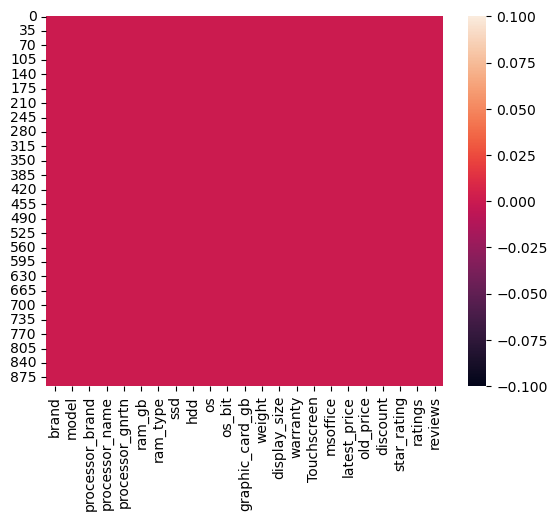

In [46]:
sns.heatmap(df.isnull())

In [10]:
df.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


# visualisasi data

C:\Users\user\AppData\Local\Temp\ipykernel_14728\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

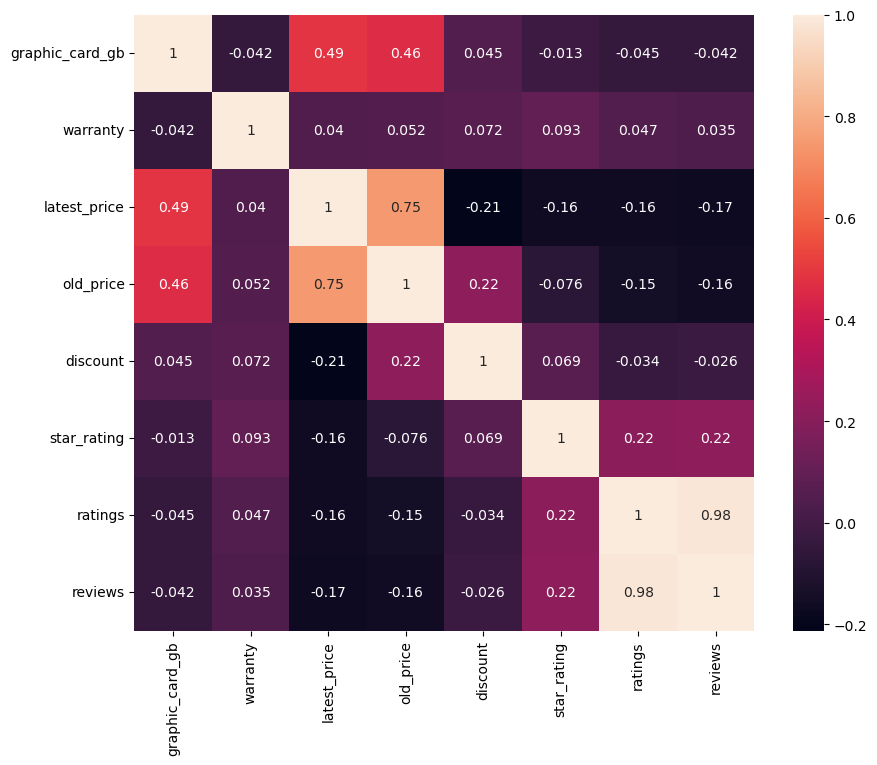

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Laptop Berdasarkan Brand

In [48]:
brand = df.groupby('brand').count()[['latest_price']].sort_values(by='latest_price',ascending=True).reset_index()
brand = brand.rename(columns={'latest_price':'Jumlah_BrandLaptop'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'iball'),
  Text(1, 0, 'SAMSUNG'),
  Text(2, 0, 'Mi'),
  Text(3, 0, 'Smartron'),
  Text(4, 0, 'RedmiBook'),
  Text(5, 0, 'lenovo'),
  Text(6, 0, 'MICROSOFT'),
  Text(7, 0, 'ALIENWARE'),
  Text(8, 0, 'Nokia'),
  Text(9, 0, 'realme'),
  Text(10, 0, 'Infinix'),
  Text(11, 0, 'LG'),
  Text(12, 0, 'Vaio'),
  Text(13, 0, 'Avita'),
  Text(14, 0, 'APPLE'),
  Text(15, 0, 'MSI'),
  Text(16, 0, 'acer'),
  Text(17, 0, 'HP'),
  Text(18, 0, 'Lenovo'),
  Text(19, 0, 'DELL'),
  Text(20, 0, 'ASUS')])

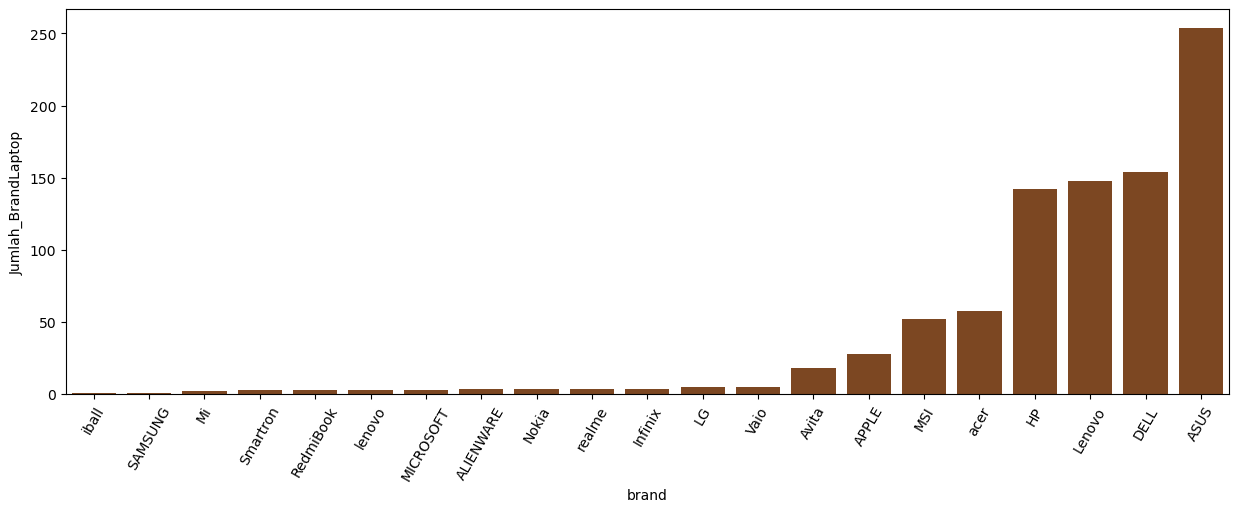

In [49]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=brand['brand'], y=brand['Jumlah_BrandLaptop'], color='saddlebrown')
plt.xticks(rotation=60)

# Jumlah Laptop Berdasarkan Model

In [50]:
model = df.groupby('model').count()[['latest_price']].sort_values(by='latest_price').reset_index()
model = model.rename(columns={'latest_price':'Jumlah_ModelLaptop'})

<Axes: xlabel='model', ylabel='Jumlah_ModelLaptop'>

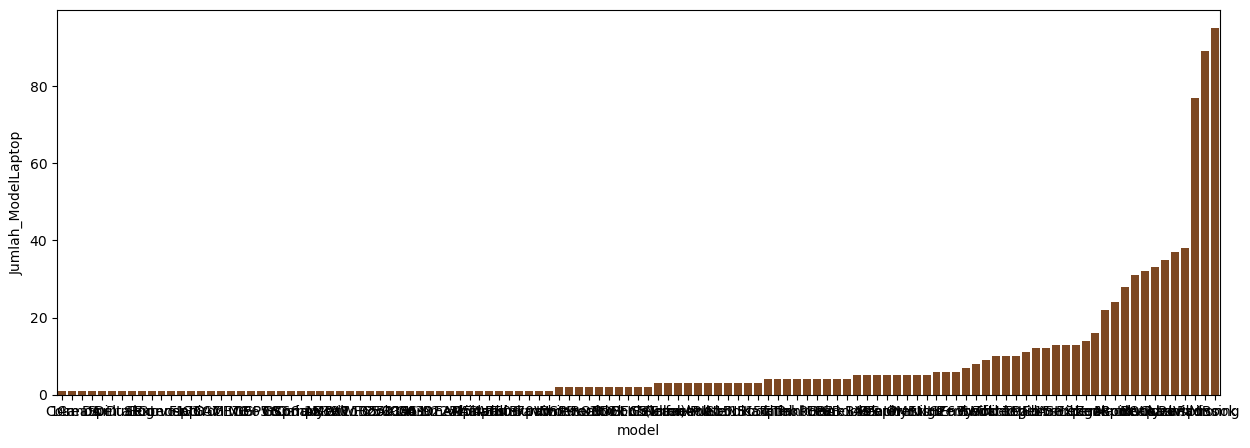

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x=model['model'], y=model['Jumlah_ModelLaptop'], color='saddlebrown')

# Jumlah Laptop Berdasarkan operating system

In [23]:
os = df.groupby('os').count()[['latest_price']].sort_values(by='latest_price').reset_index()
os = os.rename(columns={'latest_price':'Jumlah_OSLaptop'})

<Axes: xlabel='os', ylabel='Jumlah_OSLaptop'>

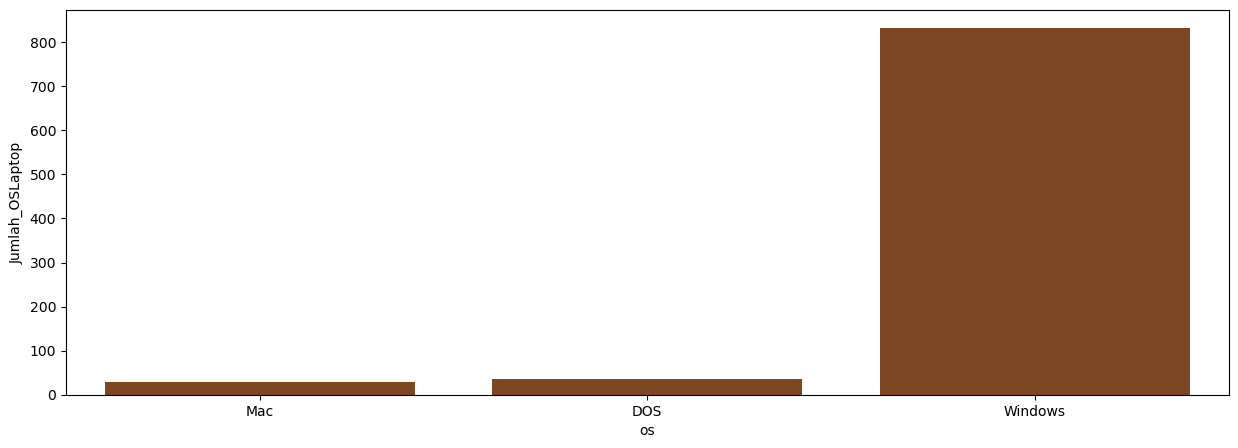

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x=os['os'], y=os['Jumlah_OSLaptop'], color='saddlebrown')

# Distribusi Harga Terbaru


C:\Users\user\AppData\Local\Temp\ipykernel_14728\2181305950.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['latest_price'], color='saddlebrown')


<Axes: xlabel='latest_price', ylabel='Density'>

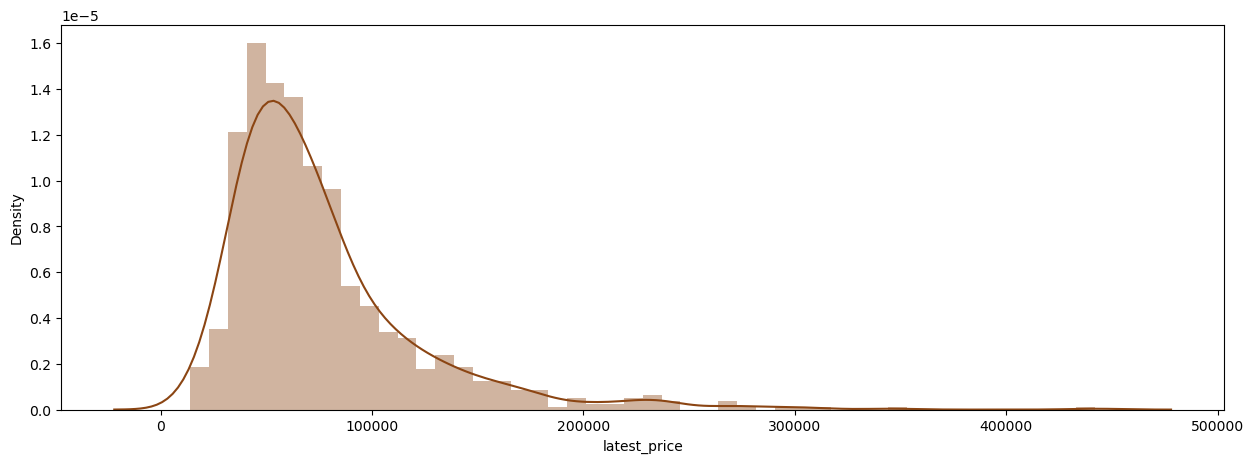

In [52]:
plt.figure(figsize=(15,5))
sns.distplot(df['latest_price'], color='saddlebrown')

# Distribusi Harga Lama

C:\Users\user\AppData\Local\Temp\ipykernel_14728\2757068309.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['old_price'], color='saddlebrown')


<Axes: xlabel='old_price', ylabel='Density'>

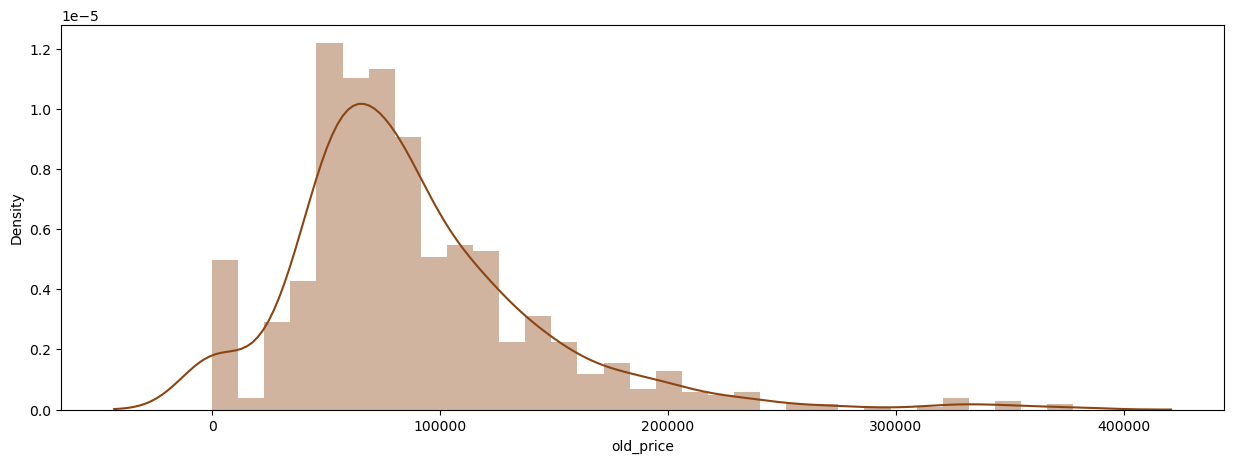

In [54]:
plt.figure(figsize=(15,5))
sns.distplot(df['old_price'], color='saddlebrown')

# MODELING
Secara garis besar untuk membuat model prediktif atau deskriptif. Pada tahap ini dilakukan metode statistika dan Machine Learning untuk penentuan terhadap teknik data mining, alat bantu data mining, dan algoritma data mining yang akan diterapkan. Lalu selanjutnya adalah melakukan penerapan teknik dan algoritma data mining tersebut kepada data dengan bantuan alat bantu. Jika diperlukan penyesuaian data terhadap teknik data mining tertentu, dapat kembali ke tahap data preparation.

# seleksi fitur

In [4]:
features = ['graphic_card_gb','warranty','old_price','discount','star_rating', 'ratings', 'reviews']
x = df[features]
y = df['latest_price']
x.shape, y.shape

((896, 7), (896,))

# split data training dan data testing

In [5]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(224,)

# EVALLUATION
Melakukan interpretasi terhadap hasil dari data mining yang dihasilkan dalam proses pemodelan pada tahap sebelumnya. Evaluasi dilakukan terhadap model yang diterapkan pada tahap sebelumnya dengan tujuan agar model yang ditentukan dapat sesuai dengan tujuan yang ingin dicapai dalam tahap pertama.

# membuat model regresi linier

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [7]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.8580115380101249


# DEPLOYMENT
Tahap deployment atau rencana penggunaan model adalah tahap yang paling dihargai dari proses CRISP-DM. Perencanaan untuk Deployment dimulai selama Business Understanding dan harus menggabungkan tidak hanya bagaimana untuk menghasilkan nilai model, tetapi juga bagaimana mengkonversi skor keputusan, dan bagaimana untuk menggabungkan keputusan dalam sistem operasional.

# membuat inputan model regresi linier

In [12]:
#'graphic_card_gb:8','warranty:3','old_price:32790','discount:28','star_rating:5', 'ratings:1185', 'reviews:141'
input_data = np.array([[8, 3, 32790, 28, 5, 1185, 141]])

prediction = lr.predict(input_data)
print('Estimasi Harga Laptop  Rupee (INR) :', prediction, 'Rupiah (IDR):', prediction*180.95)

Estimasi Harga Laptop  Rupee (INR) : [59727.1649415] Rupiah (IDR): [10807630.49616395]


c:\user\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [20]:
import pickle

filename = 'estimasi_harga_laptop.sav'
pickle.dump(lr,open(filename,'wb'))